<a href="https://colab.research.google.com/github/madhavjk/mltask/blob/main/CNN_ON_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN ON MNIST**

In [1]:
import numpy as np
import pandas as pd 
import os

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y = 1


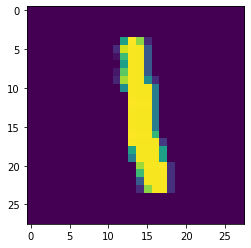

In [9]:
index = 6
plt.imshow(x_train[index].reshape((28,28)))
print ("y = " + str(y_train[index]))

In [10]:
# Exploring the dataset 
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px)+")")
print ("train_x_orig shape: " + str(x_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x_orig shape: " + str(x_test.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28)
train_x_orig shape: (60000, 28, 28)
train_y shape: (60000,)
test_x_orig shape: (10000, 28, 28)


In [11]:
# Reshape the training and test examples 
x_train, x_test = x_train / 255.0, x_test / 255.0
train_x = x_train.reshape((m_train,28,28,1)) # The "-1" makes reshape flatten the remaining dimensions
test_x= x_test.reshape((m_test,28,28,1))

input_shape=(28,28,1)
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (60000, 28, 28, 1)
test_x's shape: (10000, 28, 28, 1)


**CNN ON MNIST**

In [12]:
#implementing the model of the layers
model=Sequential()
model.add(Conv2D(6,kernel_size=(1,1),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16,kernel_size=(5,5),input_shape=(14,14,6)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(120,activation=tf.nn.relu))
model.add(Dense(84,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [13]:
#compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x=train_x,y=y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4231 - accuracy: 0.8774
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0756 - accuracy: 0.9773
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0485 - accuracy: 0.9846
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9866
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0250 - accuracy: 0.9924
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0168 - accuracy: 0.9948
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9951
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

Predicted No is:  3


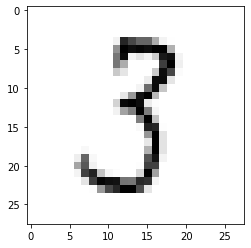

In [15]:
#printed example from the test database
image_index=231
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1, 28,28, 1))
print("Predicted No is: ",pred.argmax())
